Getting started with loading CHUV data
--------------------------------------

In this notebook, you can see examples of how to load some of the CHUV data, such as *dt5*, 
or *gdp* generated files, or even whole *absd* directory.

Requirements:  
* having the *__UP2/* data 
* having set the env variable ``DATA_DIR`` to the above mentioned directory

*Author: Etienne de Montalivet*

In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import sys
import os
sys.path
sys.path.append('/Users/theomaetz/Downloads/MA3/INL/lighthouse-main')
os.environ['DATA_DIR'] = '/Volumes'

In [11]:
from pathlib import Path
import matplotlib.pyplot as plt

import lighthouse.metadata as metadata
from lighthouse.data_loader.load_chuv import load_absd, load_dt5, load_gdp, load_smr

training_sessions = metadata.get_training_sessions()

2024-10-02 22:10:31.216 | WARNING  | lighthouse.metadata:get_training_sessions:125 - Only found 65 out of 66 training sessions


### GDP files - stimulation

Loading GDP files for all sessions is still ongoing work which is why we load a specific session here.

In [13]:
data_dir = Path(os.environ["DATA_DIR"]) / "__UP2" / "0_RAW_DATA" / "UP2_001"
(
    (stim_data, stim_times, stim_ch_names),
    (pred_data, pred_times, pred_ch_names),
    (enable_stim_data, enable_stim_times),
    lm,
    stim_metadata,
) = load_gdp(
    data_dir
    / "UP2001_2023_11_02_BSITraining_day11"
    / "GDP"
    / "Patients"
    / "Patient_UP2001Rostral"
    / "Sessions"
    / "Session_20231102141829"
    / "GeneralLogs"
)

In [14]:
stim_data.shape, pred_data.shape, enable_stim_data.shape

((2, 4802), (13, 10543), (7,))

In [15]:
stim_ch_names, pred_ch_names

(['newElbowExtension', 'newshflex'],
 ['elbowextension',
  'elbowflexion',
  'handclose',
  'handopen',
  'idle',
  'shoulderabduction',
  'shoulderadduction',
  'shoulderextension',
  'shoulderextrot',
  'shoulderflexion',
  'shoulderintrot',
  'wristpronation',
  'wristsupination'])

In [16]:
stim_metadata.keys()

dict_keys(['newElbowExtension', 'newshflex', 'is_enable'])

In [17]:
stim_metadata["newElbowExtension"]

,Electrodes,LeadNum,FrequencyPeriod,FrequencyOffset,Amplitude,RelativeAmplitude,Ramping,Pulses,ModulationPeriod,Duration,RampingDuration,gdp_time,external_time
0,"[-1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,...",0,50000,100,2.000000,0.0,False,1,0,1000,0,34690,1.698931e+12
1,"[-1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,...",0,50000,100,0.890992,0.0,False,1,0,1000,0,94769,1.698931e+12
2,"[-1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,...",0,50000,100,0.739594,0.0,False,1,0,1000,0,95070,1.698931e+12
3,"[-1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,...",0,50000,100,0.730589,0.0,False,1,0,1000,0,95368,1.698931e+12
4,"[-1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,...",0,50000,100,0.792260,0.0,False,1,0,1000,0,95608,1.698931e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,"[-1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,...",0,50000,100,0.752417,0.0,False,1,0,1000,0,1156119,1.698932e+12
4798,"[-1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,...",0,50000,100,0.760561,0.0,False,1,0,1000,0,1156479,1.698932e+12
4799,"[-1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,...",0,50000,100,0.742653,0.0,False,1,0,1000,0,1156838,1.698932e+12
4800,"[-1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,...",0,50000,100,0.726116,0.0,False,1,0,1000,0,1157139,1.698932e+12


In [18]:
enable_stim_data, enable_stim_times

(array([0, 1, 0, 1, 0, 1, 0]),
 array([1.69893120e+12, 1.69893128e+12, 1.69893148e+12, 1.69893187e+12,
        1.69893197e+12, 1.69893209e+12, 1.69893224e+12]))

### smr files - pure hardware data (ecog, trigger, temp, acc)

In [19]:
smr_files = list(Path(training_sessions[0]).glob("**/*.smr"))
smr_file = smr_files[0]
display(smr_files)

[PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_13_59_55 (rec1)/SN07_merged.smr'),
 PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_14_17_20 (rec2_HandOpen_Close)/SN07_merged.smr'),
 PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_15_03_57 (rec3)/SN07_merged.smr'),
 PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_15_17_33 (rec4_PronationSupination)/SN07_merged.smr'),
 PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_15_34_38 (rec5_pronationSUpination_Good)/SN07_merged.smr')]

In [20]:
signals, times, ch_names = load_smr(smr_file)

2024-10-02 22:14:59.514 | INFO     | lighthouse.data_loader.load_chuv:load_smr:1039 - Loading /Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_13_59_55 (rec1)/SN07_merged.smr
Units "Â°C" can not be converted to a quantity. Using dimensionless instead
Units "Â°C" can not be converted to a quantity. Using dimensionless instead


In [21]:
signals.shape, times.shape, ch_names

((41, 574707),
 (574707,),
 ['RMSPV',
  'Tr7',
  'RaccX',
  'RaccY',
  'RaccZ',
  'RWover',
  'RWused',
  'R77',
  'R57',
  'R66',
  'R46',
  'R75',
  'R55',
  'R64',
  'R44',
  'R73',
  'R53',
  'R62',
  'R71',
  'R60',
  'R51',
  'R42',
  'R40',
  'R31',
  'R33',
  'R20',
  'R22',
  'R11',
  'R00',
  'R02',
  'R13',
  'R24',
  'R04',
  'R35',
  'R15',
  'R26',
  'R06',
  'R37',
  'R17',
  'Rtemp_1',
  'Rtemp_2'])

### dt5 files - ecog + pred + features

In [22]:
dt5_files = list(Path(training_sessions[0]).glob("**/*.dt5"))
dt5_file = dt5_files[0]
display(dt5_files)

[PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_13_59_55 (rec1)/ABSD data/2023_10_24_14_07_01_01of02.dt5'),
 PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_13_59_55 (rec1)/ABSD data/2023_10_24_14_07_01_02of02.dt5'),
 PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_14_17_20 (rec2_HandOpen_Close)/ABSD data/2023_10_24_14_18_47_01of09.dt5'),
 PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_14_17_20 (rec2_HandOpen_Close)/ABSD data/2023_10_24_14_18_47_02of09.dt5'),
 PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_14_17_20 (rec2_HandOpen_Close)/ABSD data/2023_10_24_14_18_47_03of09.dt5'),
 PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_14_17_20 (rec2_HandOpen_Close)/ABSD data/2023_10_24_14_18_47_04of09

In [23]:
signals, ch_names = load_dt5(dt5_file, return_ch_names=True, return_all=True)

2024-10-02 22:23:42.023 | INFO     | lighthouse.data_loader.load_chuv:load_dt5:196 - Scenario Name: classBCIViewerAvatarAllDegreesCourtine
2024-10-02 22:23:42.029 | INFO     | lighthouse.data_loader.load_chuv:load_dt5:199 - Sub Scenario Name: classBSISubScenarioUpperJointsClassif
2024-10-02 22:23:53.139 | WARNING  | lighthouse.data_loader.load_chuv:load_dt5:422 - Skipping gamma as it is all nan


In [14]:
signals.shape, ch_names

((129, 177000),
 ['add_ch_0',
  'add_ch_1',
  'add_ch_2',
  'add_ch_3',
  'add_ch_4',
  'add_ch_5',
  'add_ch_6',
  'add_ch_7',
  'add_ch_8',
  'is_updating',
  'time__0',
  'time__1',
  'time__2',
  'time__3',
  'time__4',
  'time__5',
  'alpha_without_sm__0',
  'alpha_without_sm__1',
  'alpha_without_sm__2',
  'alpha_without_sm__3',
  'alpha_without_sm__4',
  'alpha_without_sm__5',
  'alpha_without_sm__6',
  'alpha_without_sm__7',
  'alpha_without_sm__8',
  'alpha_without_sm__9',
  'alpha_without_sm__10',
  'alpha_without_sm__11',
  'alpha_without_sm__12',
  'alpha_with_sm__0',
  'alpha_with_sm__1',
  'alpha_with_sm__2',
  'alpha_with_sm__3',
  'alpha_with_sm__4',
  'alpha_with_sm__5',
  'alpha_with_sm__6',
  'alpha_with_sm__7',
  'alpha_with_sm__8',
  'alpha_with_sm__9',
  'alpha_with_sm__10',
  'alpha_with_sm__11',
  'alpha_with_sm__12',
  'latency',
  'alpha_pred__idle',
  'alpha_pred__shoulder__flexion',
  'alpha_pred__shoulder__extension',
  'alpha_pred__shoulder__adduction',
  

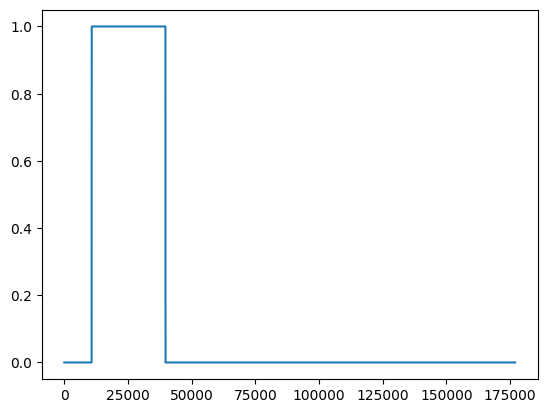

In [24]:
plt.plot(signals[ch_names.index("is_updating")])
plt.show()

### absd data (whole folder)

In [25]:
absd_dirs = [
    p.resolve() for p in Path(training_sessions[0]).glob("**") if p.is_dir() and "ABSD" in p.name or "absd" in p.name
]
absd_dir = absd_dirs[0]
display(absd_dirs)

[PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_13_59_55 (rec1)/ABSD data'),
 PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_14_17_20 (rec2_HandOpen_Close)/ABSD data'),
 PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_15_03_57 (rec3)/ABSD data'),
 PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_15_17_33 (rec4_PronationSupination)/ABSD data'),
 PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_15_34_38 (rec5_pronationSUpination_Good)/ABSD data')]

In [26]:
signals, ch_names = load_absd(absd_dir, return_is_updating=True)

2024-10-02 22:27:56.879 | INFO     | lighthouse.data_loader.load_chuv:concatenate_dt5:497 - Loading /Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_13_59_55 (rec1)/ABSD data/2023_10_24_14_07_01_01of02.dt5
2024-10-02 22:28:58.313 | INFO     | lighthouse.data_loader.load_chuv:load_dt5:196 - Scenario Name: classBCIViewerAvatarAllDegreesCourtine
2024-10-02 22:28:58.319 | INFO     | lighthouse.data_loader.load_chuv:load_dt5:199 - Sub Scenario Name: classBSISubScenarioUpperJointsClassif
2024-10-02 22:29:01.640 | INFO     | lighthouse.data_loader.load_chuv:concatenate_dt5:497 - Loading /Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_13_59_55 (rec1)/ABSD data/2023_10_24_14_07_01_02of02.dt5


In [27]:
signals.shape, ch_names

((42, 353115),
 ['add_ch_0',
  'add_ch_1',
  'add_ch_2',
  'add_ch_3',
  'add_ch_4',
  'add_ch_5',
  'add_ch_6',
  'add_ch_7',
  'add_ch_8',
  'is_updating',
  'ecog_0',
  'ecog_1',
  'ecog_2',
  'ecog_3',
  'ecog_4',
  'ecog_5',
  'ecog_6',
  'ecog_7',
  'ecog_8',
  'ecog_9',
  'ecog_10',
  'ecog_11',
  'ecog_12',
  'ecog_13',
  'ecog_14',
  'ecog_15',
  'ecog_16',
  'ecog_17',
  'ecog_18',
  'ecog_19',
  'ecog_20',
  'ecog_21',
  'ecog_22',
  'ecog_23',
  'ecog_24',
  'ecog_25',
  'ecog_26',
  'ecog_27',
  'ecog_28',
  'ecog_29',
  'ecog_30',
  'ecog_31'])

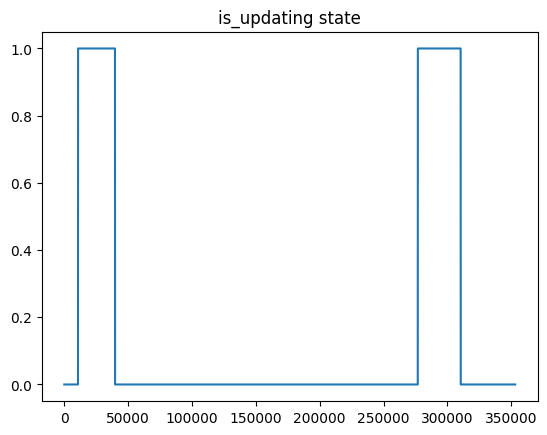

In [28]:
plt.plot(signals[ch_names.index("is_updating")])
plt.title(f"is_updating state")
plt.show()